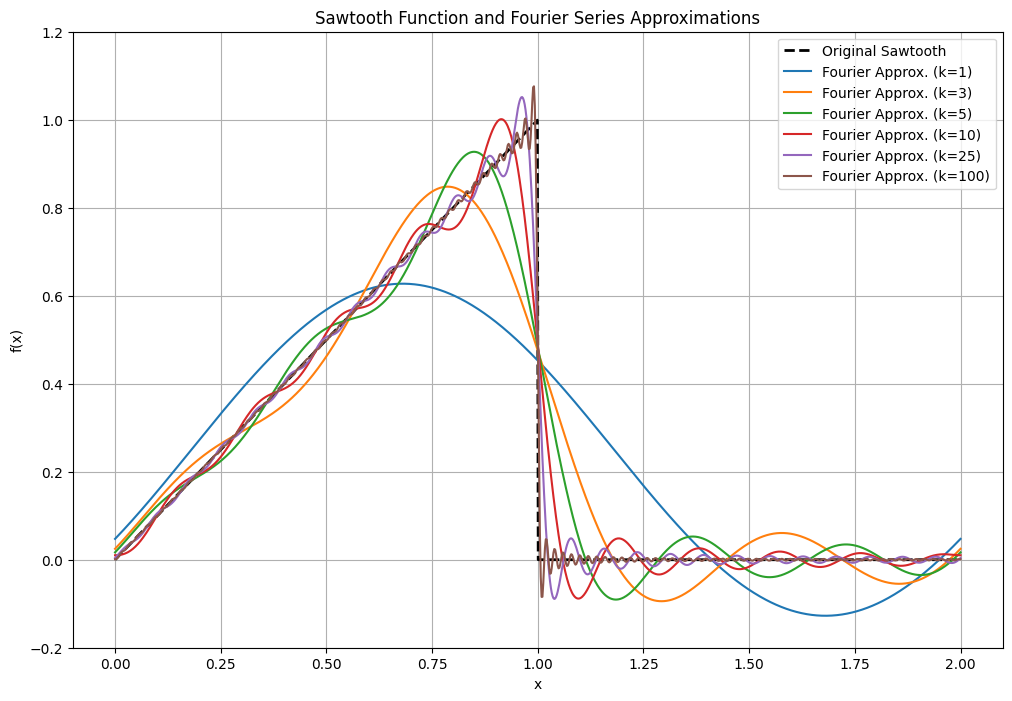

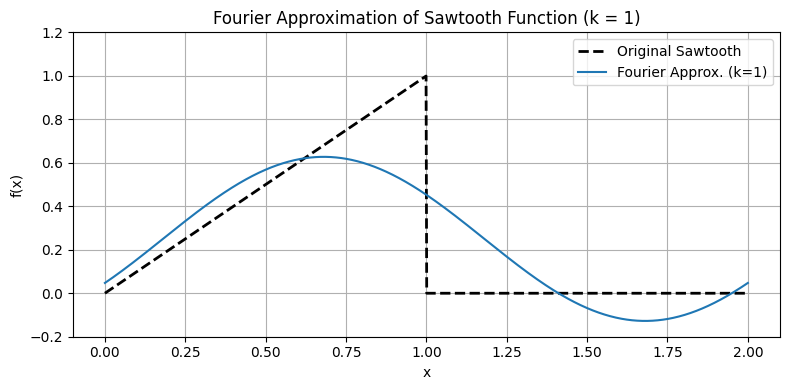

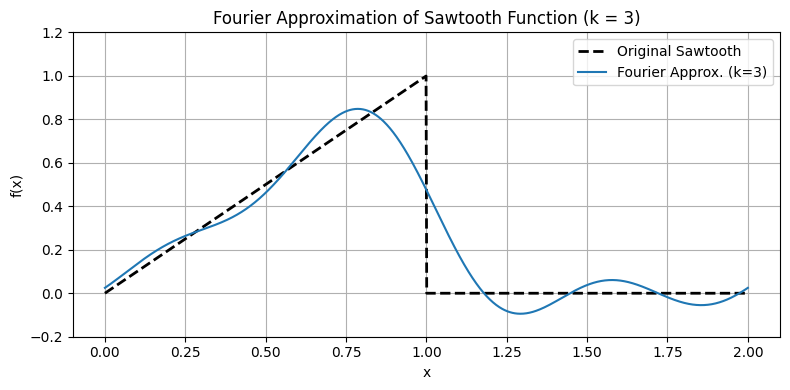

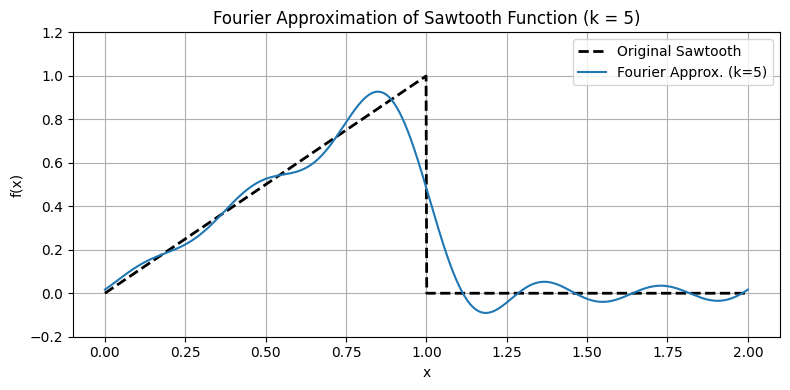

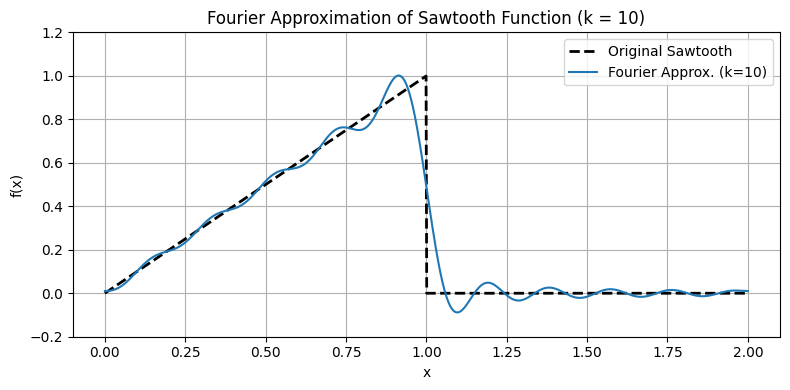

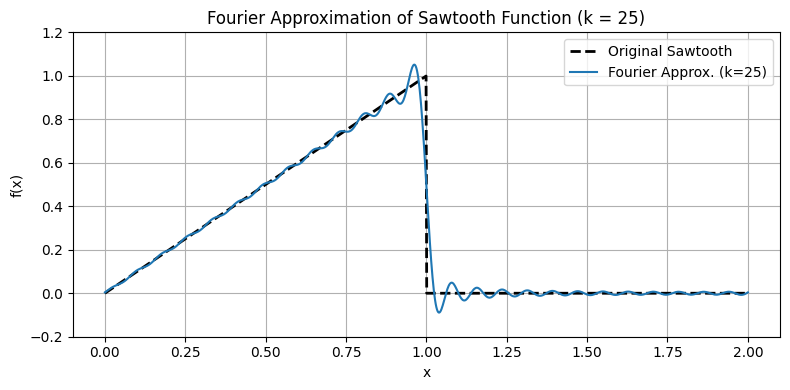

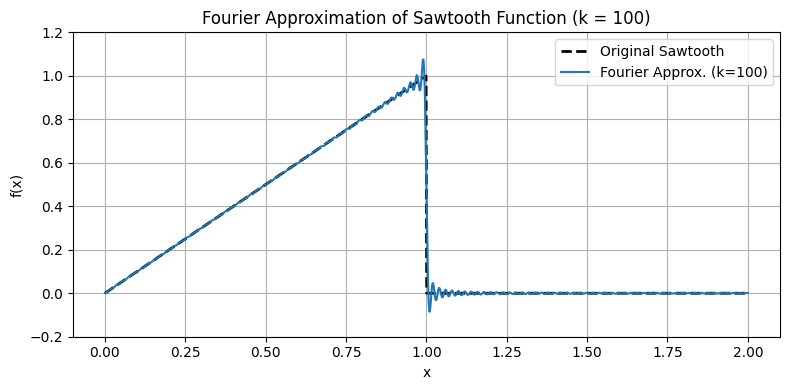

In [ ]:
#1
import numpy as np
import matplotlib.pyplot as plt

def sawtooth_func(x):
    cond = [(x > 0) & (x <= 1), (x > 1) & (x < 2)]
    func = [lambda x: x, lambda x: 0]
    return np.piecewise(x, cond, func)

L = 1.0

def a0():
    return 1 / 2

def ak(k):
    return ((-1)**k - 1) / (k**2 * np.pi**2)

def bk(k):
    return ((-1)**(k + 1)) / (k * np.pi)

def fourier_series_approx(x, K):
    series = (a0() / 2.0) * np.ones_like(x)
    for k in range(1, K + 1):
        series += ak(k) * np.cos(k * np.pi * x / L) + bk(k) * np.sin(k * np.pi * x / L)
    return series

x_vals = np.linspace(0, 2, 1000)
y_true = sawtooth_func(x_vals)
K_values = [1, 3, 5, 10, 25, 100]

plt.figure(figsize=(12, 8))
plt.plot(x_vals, y_true, 'k--', linewidth=2, label='Original Sawtooth')

for K in K_values:
    y_approx = fourier_series_approx(x_vals, K)
    plt.plot(x_vals, y_approx, label=f'Fourier Approx. (k={K})')

plt.title("Sawtooth Function and Fourier Series Approximations")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.ylim(-0.2, 1.2)
plt.grid(True)
plt.legend()
plt.show()

for K in K_values:
    y_approx = fourier_series_approx(x_vals, K)
    plt.figure(figsize=(8, 4))
    plt.plot(x_vals, y_true, 'k--', linewidth=2, label='Original Sawtooth')
    plt.plot(x_vals, y_approx, label=f'Fourier Approx. (k={K})')
    plt.title(f"Fourier Approximation of Sawtooth Function (k = {K})")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.ylim(-0.2, 1.2)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()

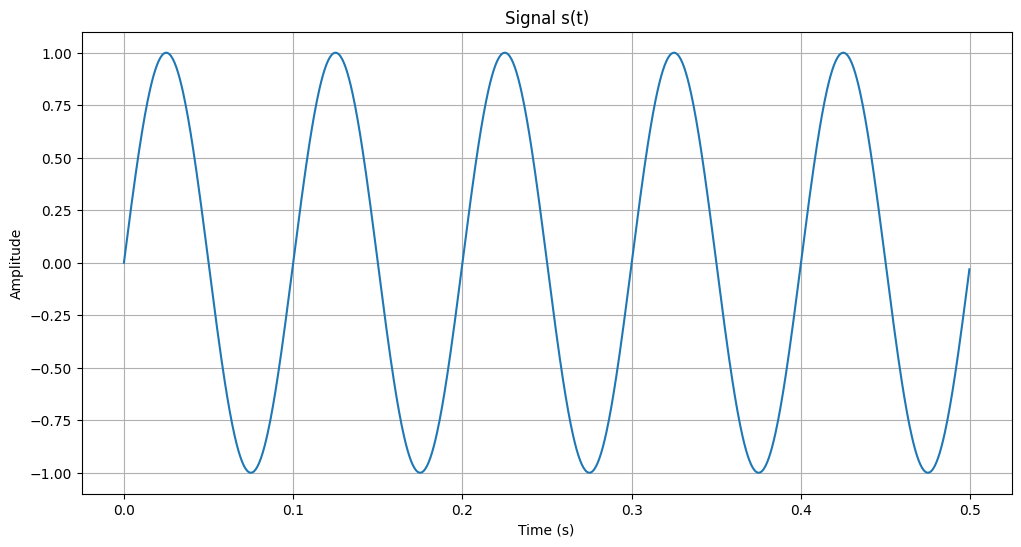

Total number of data points (n): 1000
Total time duration: 0.499 seconds

--- Estimating Frequency from Plot ---
Observe the plot: Identify the time taken for 5 complete cycles.
Estimated time for 5 cycles: 0.499 s
Estimated period (T = time/5): 0.0999 s
Estimated frequency (f = 1/T): 10.01 Hz

--- Calculating Frequencies f0 to f6 ---
f0 = 0.0000 Hz
f1 = 2.0000 Hz
f2 = 4.0000 Hz
f3 = 6.0000 Hz
f4 = 8.0000 Hz
f5 = 10.0000 Hz
f6 = 12.0000 Hz

--- Calculating Manual DFT Coefficients C0 to C6 ---

--- Calculating Power Spectrum P0 to P6 ---
P0 = 4.5438e-37
P1 = 1.5777e-38
P2 = 1.6004e-35
P3 = 6.8057e-35
P4 = 2.0195e-35
P5 = 2.5000e-04
P6 = 5.0487e-36

--- Frequency with Maximum Energy (from P0-P6) ---
The maximum power P5 = 2.5000e-04 occurs at frequency f5 = 10.0000 Hz
This frequency (10.00 Hz) should match the estimated frequency from the plot (10.01 Hz).

--- Verification using numpy.fft.fft ---
Comparing manually calculated Ck with scaled FFT coefficients (first 7):
 k | Manual Ck     

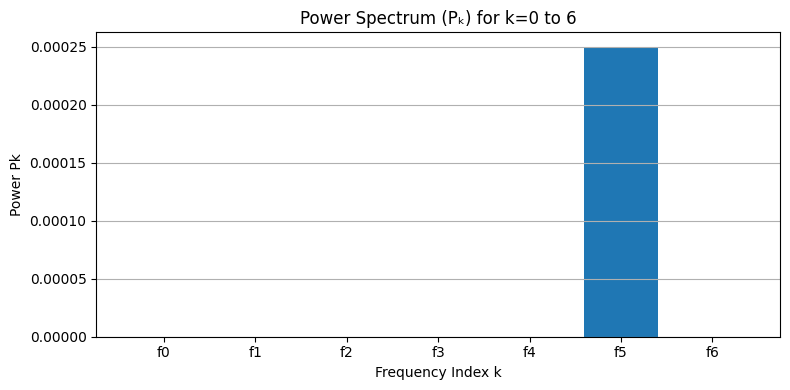

In [ ]:
#2
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

Fs = 2000.0

mat_data = scipy.io.loadmat('dataF.mat')
s = mat_data['s'].flatten()
n = len(s)
t = np.arange(n) / Fs

plt.figure(figsize=(12, 6))
plt.plot(t, s)
plt.title('Signal s(t)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

print(f"Total number of data points (n): {n}")
print(f"Total time duration: {t[-1]:.3f} seconds")
print("\n--- Estimating Frequency from Plot ---")
print("Observe the plot: Identify the time taken for 5 complete cycles.")
time_for_5_cycles = t[-1]
period_T_estimated = time_for_5_cycles / 5.0
frequency_estimated = 1.0 / period_T_estimated
print(f"Estimated time for 5 cycles: {time_for_5_cycles:.3f} s")
print(f"Estimated period (T = time/5): {period_T_estimated:.4f} s")
print(f"Estimated frequency (f = 1/T): {frequency_estimated:.2f} Hz")

print("\n--- Calculating Frequencies f0 to f6 ---")
k_values = np.arange(7)
frequencies_fk = Fs * k_values / n

for k, fk_val in enumerate(frequencies_fk):
    print(f"f{k} = {fk_val:.4f} Hz")

print("\n--- Calculating Manual DFT Coefficients C0 to C6 ---")
coefficients_Ck = []

for k in k_values:
    fk = frequencies_fk[k]
    exp_term = np.exp(-1j * 2 * np.pi * fk * t)
    s_times_exp = s * exp_term
    Ck = (1.0 / n) * np.sum(s_times_exp)
    coefficients_Ck.append(Ck)

coef_Ck = np.array(coefficients_Ck)

print("\n--- Calculating Power Spectrum P0 to P6 ---")
power_spec_Pk = (np.abs(coef_Ck)**2) / n

for k, Pk_val in enumerate(power_spec_Pk):
    print(f"P{k} = {Pk_val:.4e}")

print("\n--- Frequency with Maximum Energy (from P0-P6) ---")
max_power_index = np.argmax(power_spec_Pk)
max_power_freq = frequencies_fk[max_power_index]
print(f"The maximum power P{max_power_index} = {power_spec_Pk[max_power_index]:.4e} occurs at frequency f{max_power_index} = {max_power_freq:.4f} Hz")
print(f"This frequency ({max_power_freq:.2f} Hz) should match the estimated frequency from the plot ({frequency_estimated:.2f} Hz).")

print("\n--- Verification using numpy.fft.fft ---")
fft_coeffs_raw = np.fft.fft(s)

fft_coeffs_scaled = fft_coeffs_raw / n

print("Comparing manually calculated Ck with scaled FFT coefficients (first 7):")
print(" k | Manual Ck         | Scaled FFT[k]     | Difference")
print("---|-------------------|-------------------|------------")
for k in k_values:
    manual_Ck = coefficients_Ck[k]
    fft_Ck = fft_coeffs_scaled[k]
    diff = np.abs(manual_Ck - fft_Ck)
    print(f" {k} | {manual_Ck: .4f} | {fft_Ck: .4f} | {diff:.2e}")

print("\nNote: Differences should be very small (close to zero), accounting for potential floating-point inaccuracies.")
for k in k_values:
    print(f"f{k} = {frequencies_fk[k]:.2f} Hz | Manual Ck = {coefficients_Ck[k]:.4f} | FFT = {fft_coeffs_scaled[k]:.4f}")

plt.figure(figsize=(8, 4))
plt.bar(k_values, power_spec_Pk, tick_label=[f"f{k}" for k in k_values])
plt.title("Power Spectrum (Pₖ) for k=0 to 6")
plt.xlabel("Frequency Index k")
plt.ylabel("Power Pk")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


Loading data from dataF.mat...
Data loaded successfully.


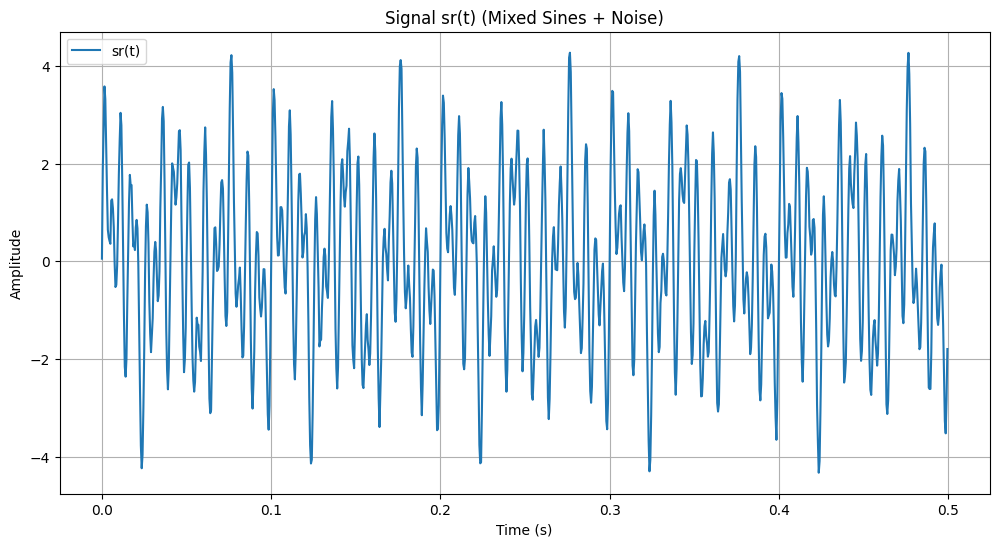


Signal 'sr' contains 1000 data points.
Total time duration for sr: 0.499 seconds

--- Computing and Plotting FFT ---


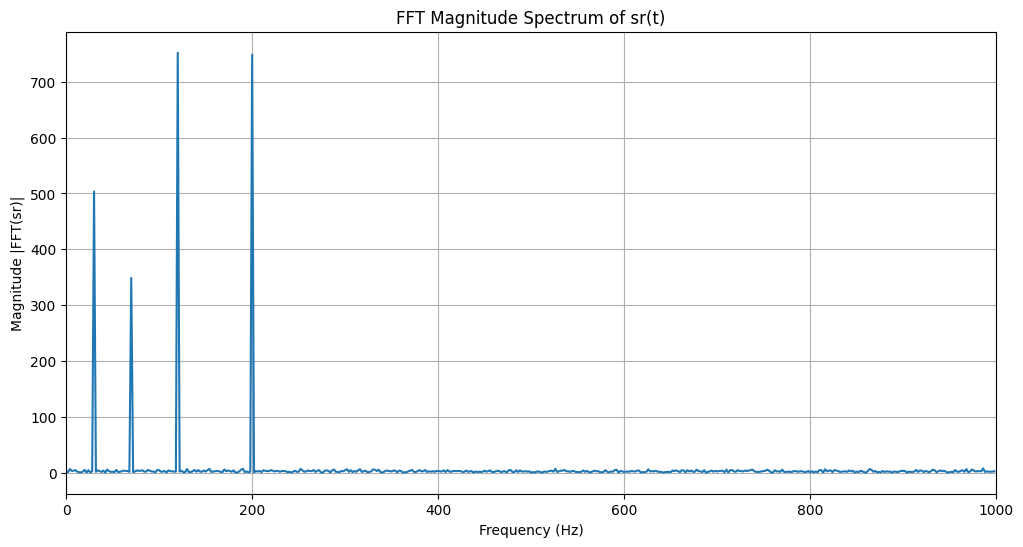

In [ ]:
#3
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

Fs = 2000.0

mat_data = scipy.io.loadmat('dataF.mat')
sr = mat_data['sr'].flatten()

n_sr = len(sr)
t_sr = np.arange(n_sr) / Fs

plt.figure(figsize=(12, 6))
plt.plot(t_sr, sr, label='sr(t)')
plt.title('Signal sr(t) (Mixed Sines + Noise)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()
print(f"\nSignal 'sr' contains {n_sr} data points.")
print(f"Total time duration for sr: {t_sr[-1]:.3f} seconds")

print("\n--- Computing and Plotting FFT ---")

fft_sr = np.fft.fft(sr)
freq_vector = np.fft.fftfreq(n_sr, d=1.0/Fs)
fft_magnitude = np.abs(fft_sr)

plt.figure(figsize=(12, 6))

positive_freq_indices = np.where(freq_vector >= 0)

plt.plot(freq_vector[positive_freq_indices], fft_magnitude[positive_freq_indices])
plt.title('FFT Magnitude Spectrum of sr(t)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude |FFT(sr)|')
plt.grid(True)
plt.xlim(0, Fs / 2)
plt.show()

#Peaks of frequency at about 30,75,125, and 200 Hz


--- Audio File Information ---
Original Sampling Rate (sr): 44100 Hz
Number of samples: 249408
Audio Duration: 5.66 seconds

--- Plotting Waveform ---


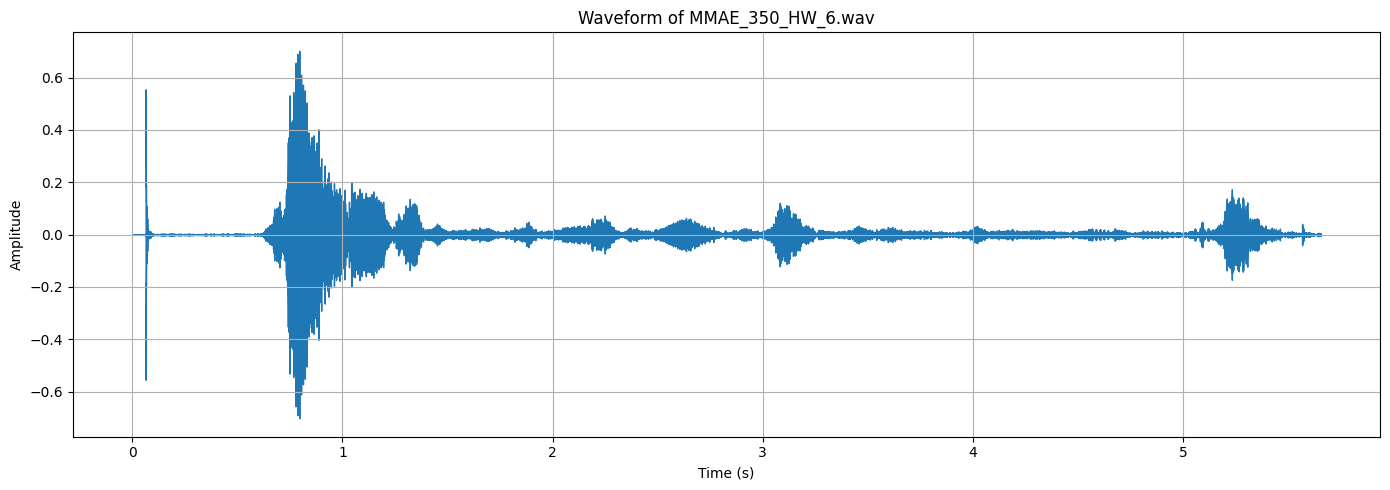


--- Plotting Power Spectrum ---


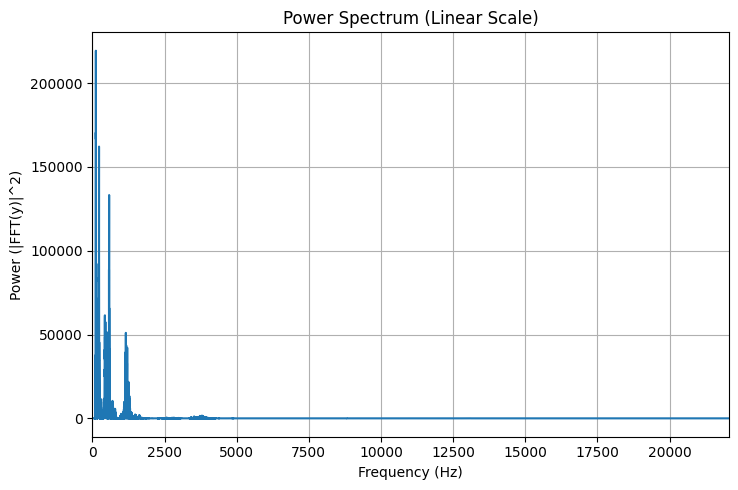

In [ ]:
#4
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os

audio_file_path = 'MMAE_350_HW_6.wav'

try:
    y, sr = librosa.load(audio_file_path, sr=None)
    duration = librosa.get_duration(y=y, sr=sr)

    print(f"\n--- Audio File Information ---")
    print(f"Original Sampling Rate (sr): {sr} Hz")
    print(f"Number of samples: {len(y)}")
    print(f"Audio Duration: {duration:.2f} seconds")

except Exception as e:
    print(e)

print("\n--- Plotting Waveform ---")
t = np.linspace(0, duration, num=len(y))

plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title(f'Waveform of {os.path.basename(audio_file_path)}')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print("\n--- Plotting Power Spectrum ---")

fft_y = np.fft.fft(y)
fft_magnitude = np.abs(fft_y)
power_spectrum = fft_magnitude**2

n = len(y)
freq_vector = np.fft.fftfreq(n, d=1.0/sr)
positive_freq_indices = np.where(freq_vector >= 0)
freq_vector_positive = freq_vector[positive_freq_indices]
power_spectrum_positive = power_spectrum[positive_freq_indices]

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(freq_vector_positive, power_spectrum_positive)
plt.title('Power Spectrum (Linear Scale)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (|FFT(y)|^2)')
plt.grid(True)
plt.xlim(0, sr / 2)
plt.tight_layout()

#Prominent Frequencies
#In the linear plot, these are the highest spikes(Close to 0)